In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-important/train_ctrUa4K.csv
/kaggle/input/dataset-important/test_lAUu6dG.csv


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [33]:
train = pd.read_csv("../input/dataset-important/train_ctrUa4K.csv")
test = pd.read_csv("../input/dataset-important/test_lAUu6dG.csv")
train_original = train.copy()
test_original = test.copy()

In [34]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
train.columns
train.dtypes
train.shape

(614, 13)

<AxesSubplot:>

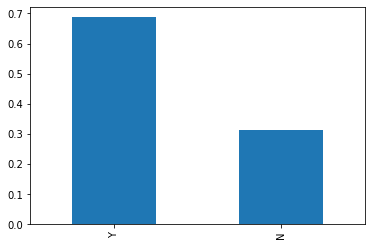

In [36]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

<AxesSubplot:title={'center':'Credit_History'}>

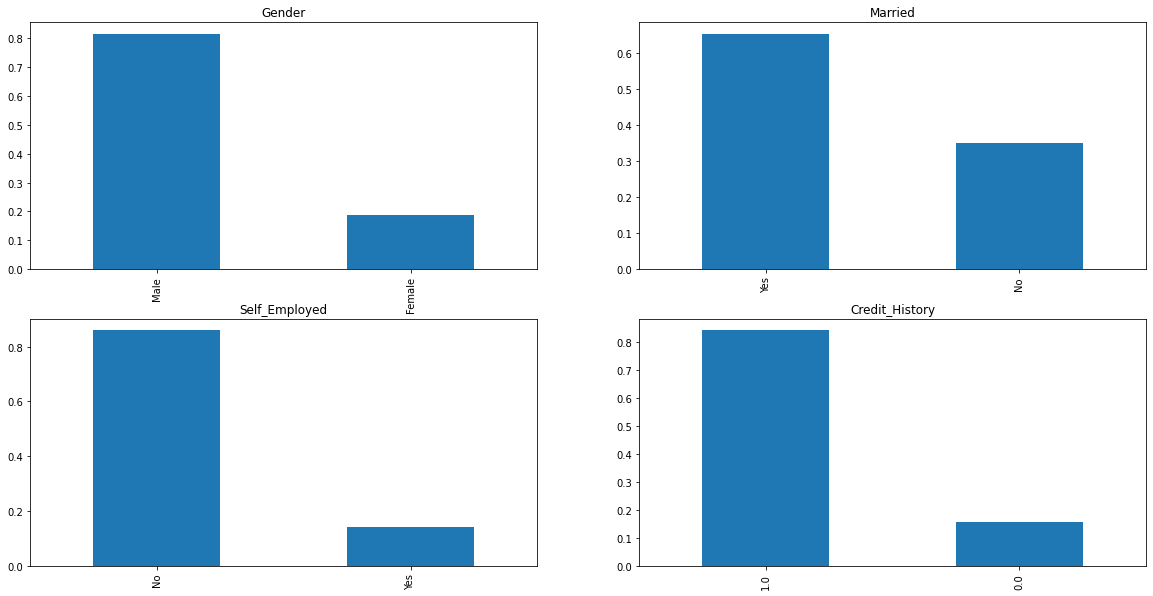

In [37]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

<AxesSubplot:title={'center':'Property_Area'}>

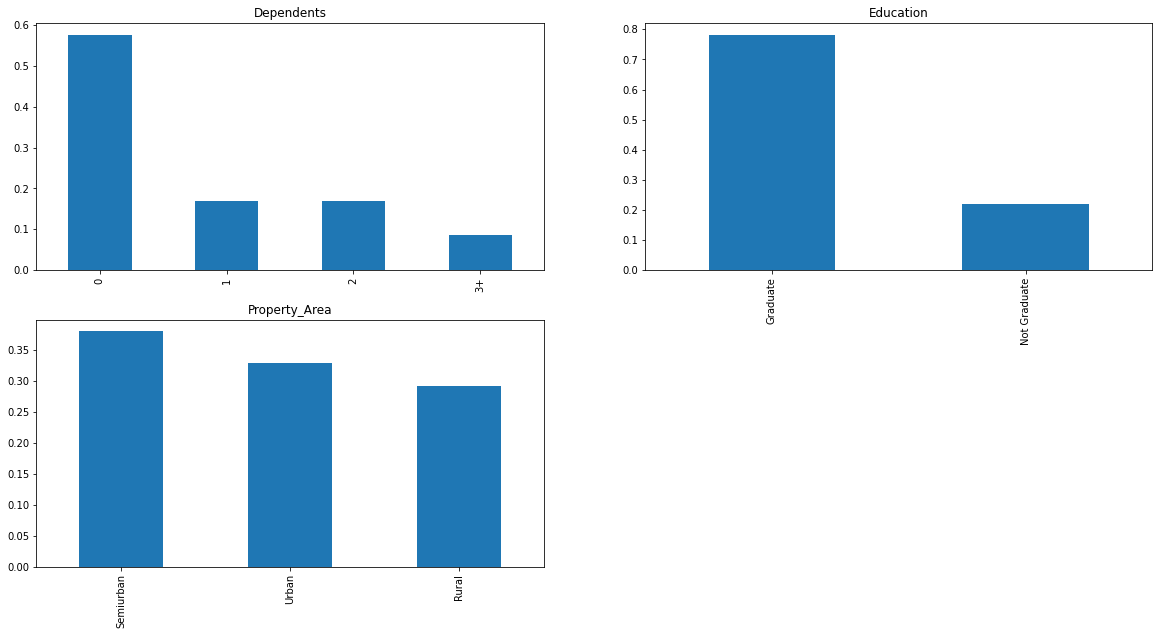

In [38]:
plt.subplot(221)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')
plt.subplot(222)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Education')
plt.subplot(223)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Property_Area')

<AxesSubplot:title={'center':'ApplicantIncome'}>

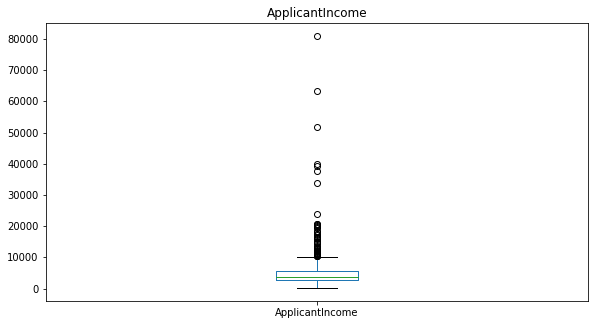

In [39]:

sns.displot(train['ApplicantIncome']);
plt.subplot(221)
train['ApplicantIncome'].plot.box(figsize=(20,10),title='ApplicantIncome')

In [40]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [42]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [43]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [44]:
train= train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis =1)
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [45]:
y = train_original.Loan_Status

In [46]:
y.replace('N',0,inplace=True)
y.replace('Y',1,inplace=True)

In [47]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [48]:
X= pd.get_dummies(X)
train= pd.get_dummies(train)
test= pd.get_dummies(test)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_cv)

In [52]:
accuracy_score(y_cv,predict)

0.8

In [53]:
testpredict = model.predict(test)

In [54]:
testpredict = pd.DataFrame(testpredict,columns=['Loan_Status'])
testpredict.replace(1,'Y',inplace=True)
testpredict.replace(0,'N',inplace=True)

In [55]:
testpredict.value_counts()

Loan_Status
Y              309
N               58
dtype: int64

In [56]:
pd.DataFrame(test_original['Loan_ID'])

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [57]:
submission= pd.DataFrame(test_original['Loan_ID']).join(testpredict)

In [58]:
submission.to_csv("submission.csv",index=False)